In [6]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor 
import numpy as np

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Spice.HighLevelElement import PulseVoltageSource

In [255]:
# Simulation variables
step = 1@u_us
end = 80@u_ms

In [274]:
circuit = Circuit('Pulse Controled Voltage Source')


# Sine Source
Vrms = 110 
A=Vrms*np.sqrt(2)@u_V
f=60@u_Hz
source = circuit.SinusoidalVoltageSource('Source', '1', circuit.gnd, amplitude=A, frequency=f)

# Defining the switch model
circuit.model('mysw', 'SW', Ron=1e-6, Roff=1e6)

# Pulse definitions
initial_value = -10@u_V 
pulsed_value = 10@u_V
pulse_width = end           # Can control a window 
period = end                # Just one Pulse 
delay_time= 10@u_ms
rise_time=step
fall_time=step
# phase=None
# dc_offset=0
circuit.PulseVoltageSource( 'Controller', '4', circuit.gnd,
    initial_value, pulsed_value, pulse_width, period, delay_time, rise_time, fall_time)

# Voltage controled switch
# Controlled by ('4', circuit.gnd)
# Close points ('1', '2')
circuit.VCS('Switch', '1', '2', '4', circuit.gnd, model = 'mysw', initial_state = 'on')

# Circuit
circuit.R('R_1', '2', '3', 1@u_Ω)
circuit.R('R_load', '3', circuit.gnd, 1@u_kΩ)
circuit.C('C', '3', circuit.gnd, 10@u_mF)

Capacitor CC

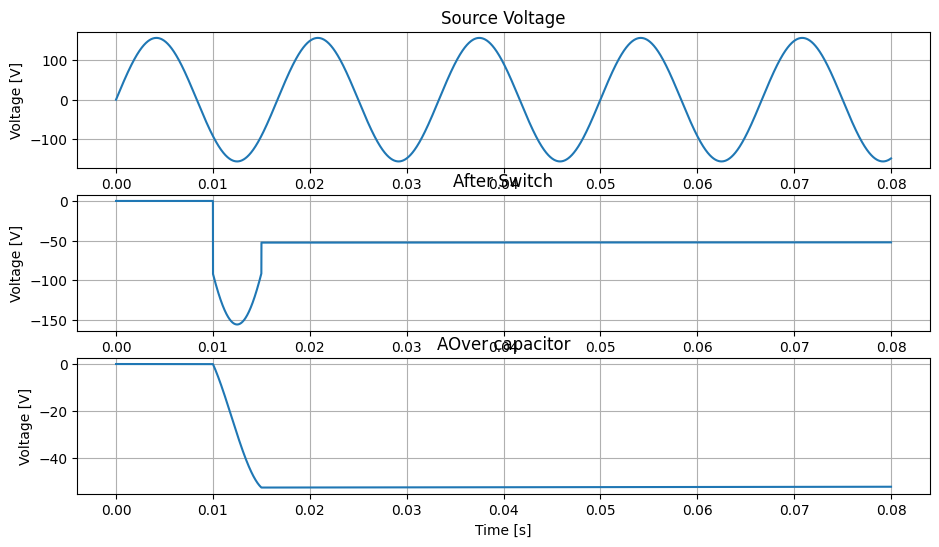

In [275]:
#######################################################################
# CIRCUIT SIMULATION

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=step, end_time=end)

#######################################################################
# PLOTS
# Verifying the source 

plt.figure(figsize=(11, 6))
plt.subplot(311)
plt.title('Source Voltage')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['1'])

plt.subplot(312)
plt.title('After Switch')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['2'])

plt.subplot(313)
plt.title('AOver capacitor')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['3'])
